# QUESTION 2.5 - PLOT GRAPHS OF ALL 6 WAVEFORMS (10 MARKS)

for n = 1, E = 1.1849365234375
for n = 2, E = 4.7349853515625
for n = 3, E = 10.663604736328125
for n = 4, E = 18.93780517578125
for n = 5, E = 29.616928100585938
for n = 6, E = 42.60237121582031


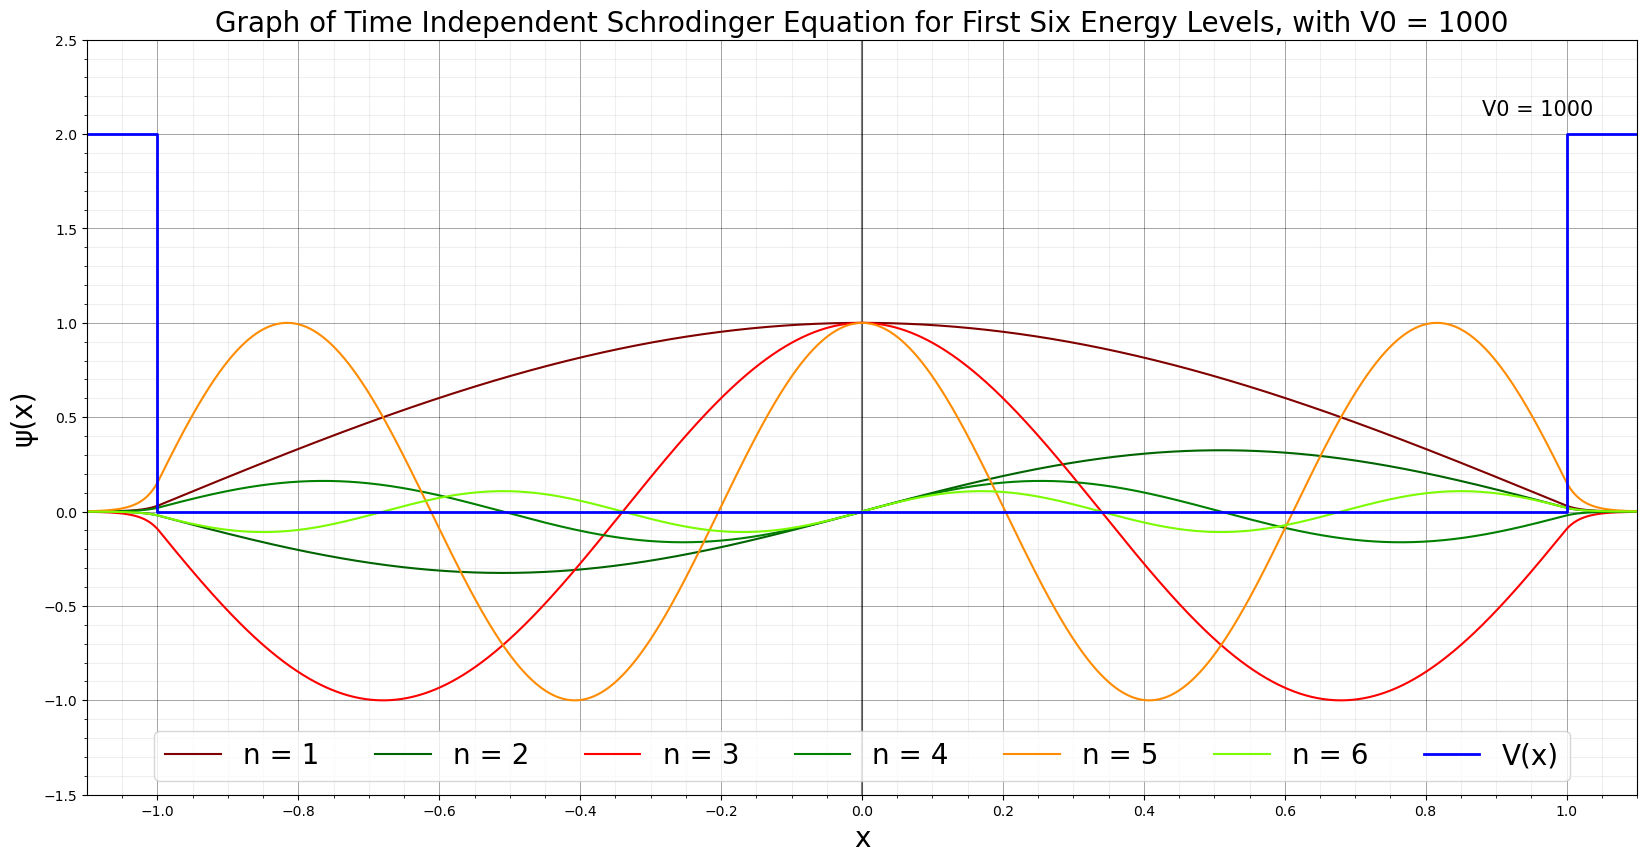

17.920466423034668
148201


In [18]:
# Question 2.5

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

start= time.time()
global count
count = 0
def graph(x_axis, plot_E1, plot_E2, plot_E3, plot_E4, plot_E5, plot_E6):    #plotting function

    # set-up figure size, quality and plot zoom
    plt.figure(figsize=(20, 10), dpi=100)
    plt.axis([-1.1, 1.1, -1.5, 2.5])
    global count
    # additional plot design elements
    plt.minorticks_on()
    plt.grid(axis="x", color="black", alpha=.5, linewidth=0.5)
    plt.grid(axis="y", color="black", alpha=.5, linewidth=0.5)
    plt.grid(b=True, which='minor', alpha=0.2)
    plt.locator_params(axis="x", nbins=20)
    plt.axvline(color='k', alpha=0.5)    # display y-axis line

    # plot information, title, and axis labels
    plt.title(f"Graph of Time Independent Schrodinger Equation for First Six Energy Levels, with V0 = {V0}", size=20)
    plt.xlabel('x', size=20)  
    plt.ylabel('ψ(x)', size=20)
    plt.text(0.88,2.1, f"V0 = {V0}", size = 15)

    # plotting of functions
    plt.plot(x_axis, plot_E1, 'maroon', label='n = 1')
    plt.plot(x_axis, plot_E2, 'darkgreen', label='n = 2')
    plt.plot(x_axis, plot_E3, 'red', label='n = 3')
    plt.plot(x_axis, plot_E4,'green', label='n = 4')    
    plt.plot(x_axis, plot_E5, 'darkorange', label='n = 5')
    plt.plot(x_axis, plot_E6, 'lawngreen', label='n = 6')

    # plot of potential well
    Vy = (-end_well, -1, -1, 1, 1, end_well)
    Vx = (2, 2, 0, 0, 2, 2)
    plt.plot(Vy, Vx, 'blue', label = 'V(x)', linewidth=2)

    # display legend and save figure
    plt.legend(loc='lower center', ncol=7, prop={'size': 20})
    plt.savefig('Exercise2_5.png', bbox_inches='tight', dpi=900)

    plt.show()
    count+=1

def schrodinger(E, n, psi):     # Verlet wave-function function
    global count
    for i in range(1, barrier_steps - 1):
        psi[i + 1]  = 2 * psi[i] - psi[i - 1] - dx * dx * psi[i] * 2 * (E - V)
        count+=1
    for i in range(barrier_steps - 1, tot_steps - 1):
        psi[i + 1]  = 2 * psi[i] - psi[i - 1] - dx * dx * psi[i] * 2 * (E - V0)
        count+=1
    if n % 2 == 0:   #sine-like function
        plot = np.append(- np.flip(psi), psi)
        plot = np.delete(plot, tot_steps - 1)

    elif n % 2 != 0:   #cosine-like function
        plot = np.append(np.flip(psi), psi)
        plot = np.delete(plot, tot_steps - 1)
    
    count+=1
    return plot    # return plot of energy level


def root(E, psi0, psi1):     # Verlet no-array loop to obtain root
    global count
    for i in range(1, barrier_steps - 1):
        psi2 = 2 * psi1 - psi0 - dx * dx * psi1 * 2 * (E - V)
        count+=1
        psi0 = psi1
        psi1 = psi2

    for i in range(barrier_steps - 1, tot_steps - 1):
        psi2 = 2 * psi1 - psi0 - dx * dx *  psi1 * 2 * (E - V0)
        count+=1
        psi0 = psi1
        psi1 = psi2
    
    count+=1
    return psi2    # return value of function at x = 1.3


def bisection_method(n):

    # parameters
    E1 = n * n
    E2 = 3 * n * n    # interval estimated based on energy level

    error = 100
    global count
    count+=1
    # data structures
    bisection_data = []
    psi = np.zeros(tot_steps)

    if n % 2 != 0:   # cosine-like functions
        # initial conditions
        gradient0 = 0
        psi0 = psi[0] =  1
        psi1 = psi[1] =  psi0 + dx * gradient0

        # bisection method loop
        while error > 10 ** - 4:

            E = (E1 + E2) / 2

            error = abs(E1 - E2) / 2
            count+=1
            temp_psi = root(E, psi0, psi1)

            bisection_data.append([abs(temp_psi), E])

            # case when energy level is COSINE and approaches zero from a NEGATIVE value
            if (n - 3) % 4 == 0:
                if temp_psi > 0:
                    E2 = E

                elif temp_psi < 0:
                    E1 = E

            # case when energy level is COSINE and approaches zero from a POSITIVE value
            elif (n - 1) % 4 == 0:
                if temp_psi < 0:
                    E2 = E

                elif temp_psi > 0:
                    E1 = E


    elif n % 2 == 0:   # sine-like functions
        # initial conditions
        gradient0 = 1
        psi0 = psi[0] = 0
        psi1 = psi[1] = psi0 + dx * gradient0
        # bisection method loop
        while error > 10 ** - 4:

            E = (E1 + E2) / 2

            error = abs(E1 - E2) / 2

            temp_psi = root(E, psi0, psi1)

            bisection_data.append([abs(temp_psi), E])
            count+=1
            # case when energy level is SINE and approaches zero from a POSITIVE value
            if (n - 4) % 4 == 0:
                if temp_psi > 0:
                    E2 = E

                elif temp_psi < 0:
                    E1 = E

            # case when energy level is SINE and approaches zero from a NEGATIVE value
            elif (n - 2) % 4 == 0:
                if temp_psi < 0:
                    E2 = E

                elif temp_psi > 0:
                    E1 = E


    E = min(bisection_data)[1]
    print(f"for n = {n}, E = {E}")

    # obtain the plot of the function
    plot = schrodinger(E, n, psi)
    
    return plot    # return the wave-function for corresponding energy level 


# parameters
V = 0
V0 = 1000

dx = 0.001


# well parameters
initial_pt = 0
start_well = 1
end_well = 1.3
tot_steps = int((end_well - initial_pt) / dx)
barrier_steps = int((start_well - initial_pt) / dx)    # barrier_steps denotes the number of steps up to the potential barrier at x = 1


# data structures
x = np.zeros(tot_steps)

x[0] = initial_pt

for i in range(1, tot_steps - 1):    # obtain x-axis
    x[i + 1] = x[i] + dx

x_axis = np.append(-np.flip(x), x)
x_axis = np.delete(x_axis, tot_steps - 1)


# plotting
graph(
    x_axis, bisection_method(n=1), bisection_method(n=2), bisection_method(n=3),
    bisection_method(n=4), bisection_method(n=5), bisection_method(n=6)
    )
finish = time.time()

print(finish - start)
print(count)